# DATA SCIENCE INTERNSHIP FOR LETSGROWMORE

## Task-1:  Iris Flower Classification ##

In [1]:
import pandas as pd                  # deals with data 
import numpy as np                   #deal with arrays 
import os                           # upload files 
import matplotlib.pyplot as plt    # display graphs  with requires specification 
import seaborn as sns             # graph module  in single line 

In [3]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df=df.drop(columns=['Id'])
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

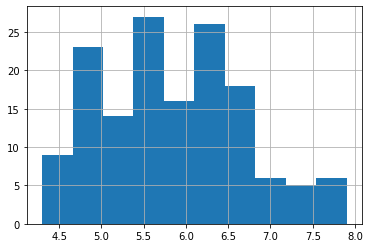

In [9]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

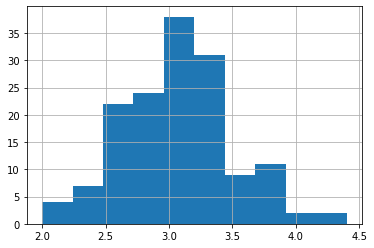

In [10]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

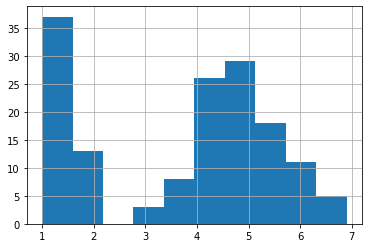

In [11]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

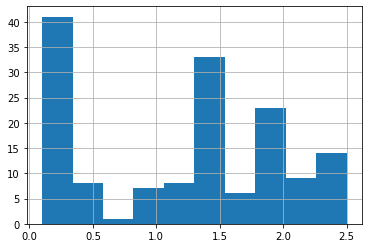

In [12]:
df['PetalWidthCm'].hist()

# Two classes are merged together one is separate 

In [13]:
colors=['red','green','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

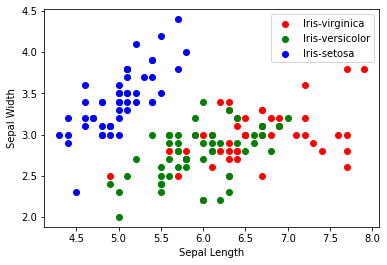

In [14]:

for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

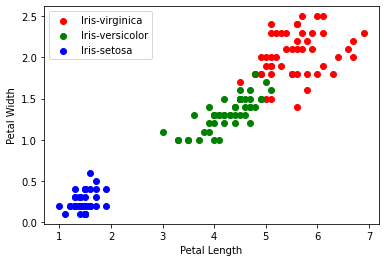

In [15]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

In [16]:
# to reduce the number of variable 
# if two variables have high correlation value, one is dropped 
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

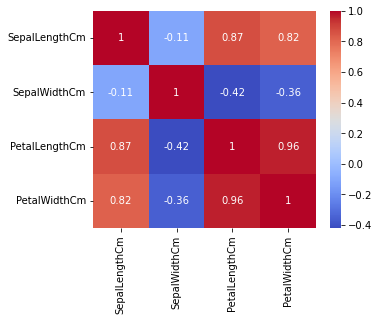

In [17]:
corr=df.corr()
fig,ax =plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax, cmap='coolwarm')

In [18]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [19]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)

In [21]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()

In [22]:
model.fit(x_train,y_train)

LogisticRegression()

In [23]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


In [24]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [25]:
model.fit(x_train,y_train)
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 96.66666666666667


TypeError: fit() missing 1 required positional argument: 'y'